# Create a WordCloud with a Hat Mask

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [2]:
# open the file and read it into a variable text
text = open("mario.txt", "r").read()

In [3]:
# inspect 
# text

In [4]:
words = {'1':'DataScientist ', '2':'Motorcyclist ', 
         '3':'Fitness ', '4':'LA ', '5':'USC ', 
         '6':'SelfMade ', '7':'Business ', '8':'Baseball ', 
         '9':'Python ', '10':'Pandas ', '11':'Machine Learning', 
         '12':'SQL ', '13':'Analyst ', '14':'git ', '15':'Optimization ', 
         '16':'Cubs ', '17':'AI ', '18':'Classification ', 
         '19':'Regression ', '20':'Matplotlib ', '21':'Numpy ', 
         '22':'Modeling ', '23':'Predictions ', '24':'GeneralAssembly ', 
         '25':'Engineer ', '26':'Entrepreneur '}

In [5]:
# create dataframe of words
df = pd.DataFrame.from_dict(words, orient='index', columns = ['words'])
df

,words
1,DataScientist
2,Motorcyclist
3,Fitness
4,LA
5,USC
6,SelfMade
7,Business
8,Baseball
9,Python
10,Pandas


## WordCloud

In [6]:
# instantiate a word cloud object
hat_wc = WordCloud( 
    max_font_size=100,
    background_color='white',
    collocations=False,
    colormap='bone'
)

# generate the word cloud
hat_wc.generate(text)

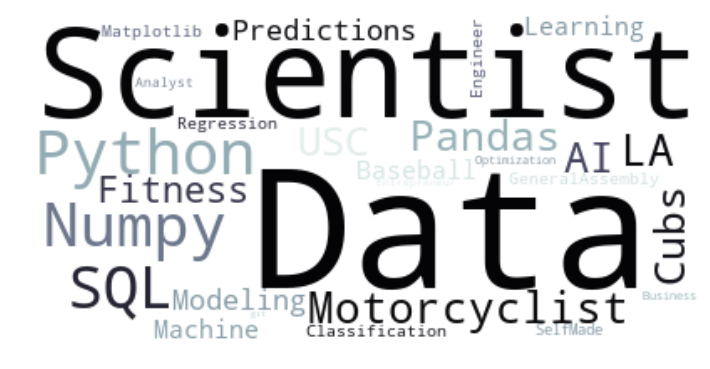

In [7]:
# display the word cloud
plt.figure(figsize=(12,12))
plt.imshow(hat_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Hat Mask

In [8]:
from PIL import Image # converting images into arrays

In [9]:
# open cap image for mask
cap_mask = np.array(Image.open('cap_PNG5685.png'))

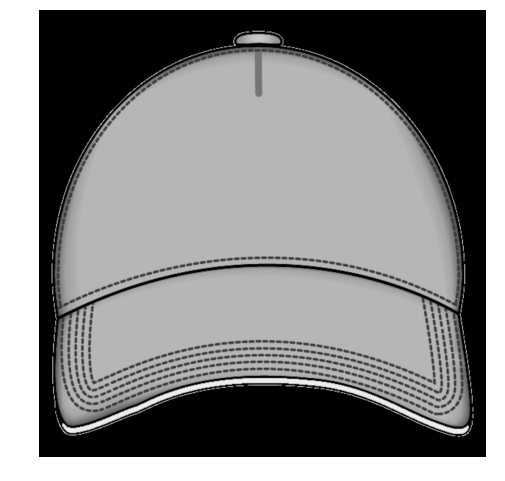

In [10]:
# display mask
fig = plt.figure()
fig.set_figwidth(8) # set width
fig.set_figheight(10) # set height

plt.imshow(cap_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
# inspect file
cap_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
# function to transform 0 to 255 so that the mask works properly
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [13]:
# Transform the mask into a new one that will work with the function:
transformed_cap_mask = np.ndarray((cap_mask.shape[0],cap_mask.shape[1]), np.int32)

for i in range(len(cap_mask)):
    transformed_cap_mask[i] = list(map(transform_format, cap_mask[i]))

In [14]:
# Check the expected result of the mask
transformed_cap_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [15]:
# instantiate a word cloud object with mask
hat_wc = WordCloud( 
    max_font_size=200,
    background_color='white',
    collocations=False,
    colormap='bone',
    mask=transformed_cap_mask,
    contour_width=3, contour_color='blue'
)

# generate the word cloud
hat_wc.generate(text)

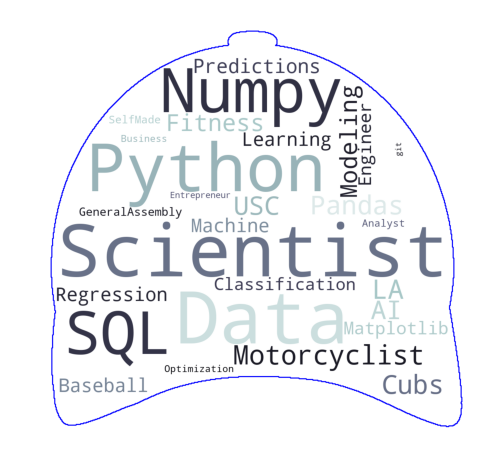

In [16]:
# display the word cloud with mask
plt.figure(figsize=(8,8))
plt.imshow(hat_wc, interpolation='kaiser')
plt.axis('off')
plt.show()

In [17]:
# save image as a PNG file
# mario_wc.to_file("capwordcloud.png")

# Find Frequency of Words in Document

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# instantiate and fit CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
cv.fit(text.split())

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [20]:
# get words with frequency
numbers = cv.fit_transform(text.split())

In [21]:
# examine tokens
cv.get_feature_names()

['ai',
 'analyst',
 'baseball',
 'business',
 'classification',
 'cubs',
 'data',
 'engineer',
 'entrepreneur',
 'fitness',
 'generalassembly',
 'git',
 'la',
 'learning',
 'machine',
 'matplotlib',
 'modeling',
 'motorcyclist',
 'numpy',
 'optimization',
 'pandas',
 'predictions',
 'python',
 'regression',
 'scientist',
 'selfmade',
 'sql',
 'usc']

In [22]:
# assign words and counts to lists
word_list = cv.get_feature_names();    
count_list = numbers.toarray().sum(axis=0)    

In [23]:
# create a dictionary from above lists
word_dict = dict(zip(word_list,count_list))

In [24]:
# create dataframe from dict
word_df = pd.DataFrame.from_dict(word_dict, orient='index', columns=['count'])
# sort by count
word_df.sort_values(by='count', ascending=False, inplace=True)
# reset the index
word_df.reset_index(inplace=True)
# rename columns
word_df.columns = ['word', 'count']
# display final formatted df
word_df

,word,count
0,scientist,23
1,data,23
2,python,19
3,numpy,18
4,sql,17
5,la,16
6,motorcyclist,16
7,ai,15
8,cubs,15
9,pandas,15


# Visualize Word Counts

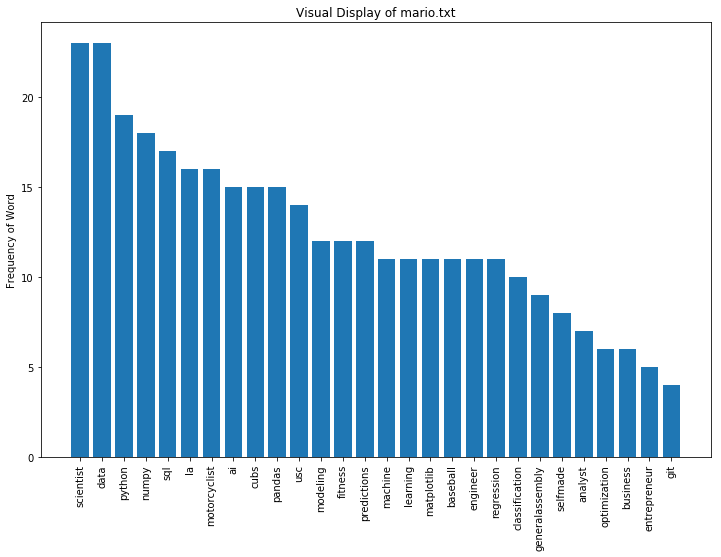

In [25]:
plt.figure(figsize=(12,8))
plt.bar(data=word_df, x='word', height='count')

plt.xticks(rotation=90)
plt.ylabel('Frequency of Word')
plt.title('Visual Display of mario.txt');


In [26]:
from matplotlib.lines import Line2D  

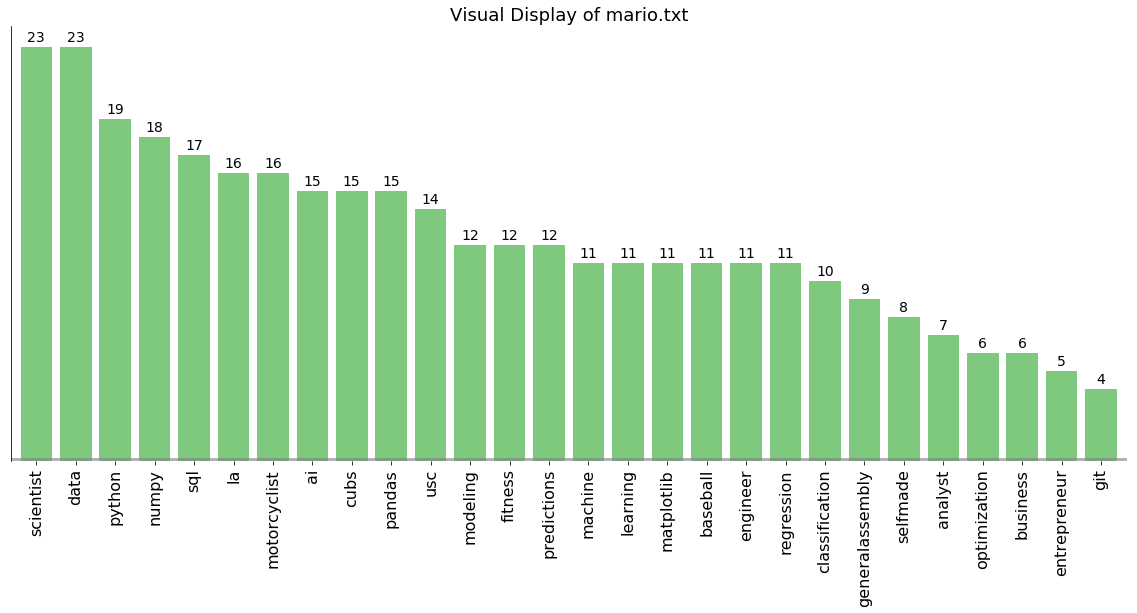

In [27]:
ax = word_df.plot(kind='bar', figsize=(20,8), width=0.8, colormap='Accent')

ax.set_title("Visual Display of mario.txt", fontsize=18)

ax.set_xticklabels(word_df.word.tolist(), fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(), 2), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

ax.legend().set_visible(False)
ax.get_yaxis().set_visible(False)

# code to draw line at the bottom
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='grey', linewidth=6, alpha=0.6));